# K-means Students Clustering dengan Python
Terdapat dataset yang menyatakan hubungan antara iq dengan nilai siswa

Goals : Mengelompokkan sendiri data-data yang menjadi masukannya tanpa mengetahui terlebih dulu target kelasnya

In [22]:
import numpy as np   # Operasi aritmatik array
import pandas as pd  # Import dataset
import warnings      # Supress ignore warning
warnings.filterwarnings("ignore")

### Membaca dataset
Membaca sebuah file csv siswa dengan menggunakan library pandas menjadi dataframe pandas

In [23]:
df = pd.read_csv('student_clustering.csv')
print("The shape of data is",df.shape)
df.head(6)  # Memeriksa apakah data sudah terinput

The shape of data is (200, 2)


,nilai,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
5,5.88,109


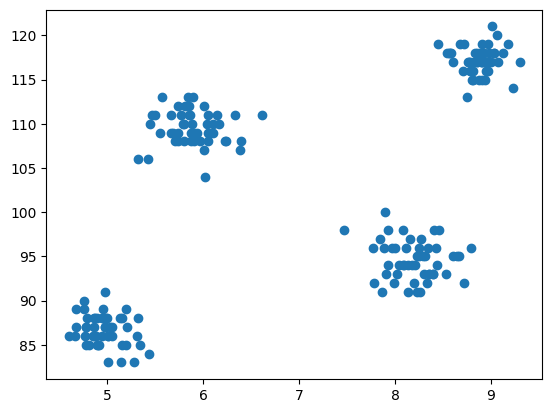

In [24]:
import matplotlib.pyplot as plt  # Plotting dataset
plt.scatter(df['nilai'],df['iq'])

## Elbow Curve
Metode yang bisa digunakan untuk menemukan jumlah optimal dari cluster (k). Goal : K dengan Jarak terpendak antar data dalam cluster dan Jarak terjauh antar cluster

In [25]:
from sklearn.cluster import KMeans

In [26]:
wcss = [] # Within Cluster Sum of Squares / Jumlah bagian Dalam Kuadrat Cluster

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [27]:
wcss

[29957.898287999997,
 4184.14127,
 2362.7133489999997,
 681.96966,
 514.1616803171114,
 395.9605877691832,
 295.4391895943192,
 242.41587382556412,
 203.4709685937251,
 174.01644967366923]

Text(0, 0.5, 'Within-Cluster Sum of Squares')

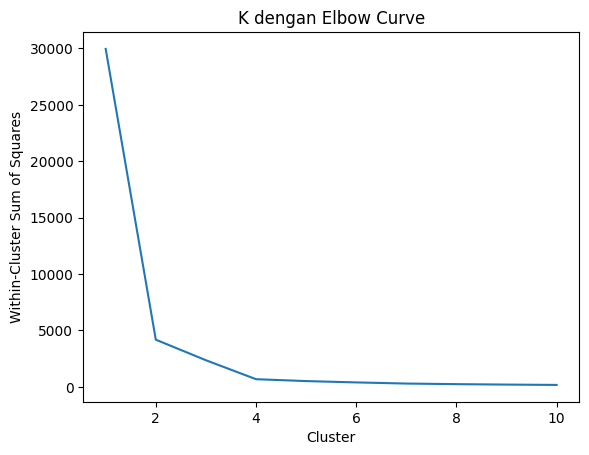

In [28]:
plt.plot(range(1,11),wcss)
plt.title('K dengan Elbow Curve')
plt.xlabel('Cluster')
plt.ylabel('Within-Cluster Sum of Squares')

In [29]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X) # Hitung pusat cluster dan prediksi indeks klaster untuk setiap sampel

In [30]:
y_means

array([2, 1, 0, 0, 1, 1, 0, 3, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 2, 3, 0, 1, 3, 1, 3, 1, 0, 0, 3, 1, 2, 1, 2, 0, 0, 2,
       3, 3, 0, 1, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 0, 3, 2, 3,
       0, 2, 1, 0, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       3, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 3, 3,
       0, 3, 1, 1, 0, 3, 0, 1, 3, 2, 2, 1, 0, 3, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 0, 1, 3, 1, 0, 2, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 2, 0,
       3, 1, 2, 3, 3, 1, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 0, 2, 3, 1,
       1, 3])

In [45]:
# X[y_means == 3,1]

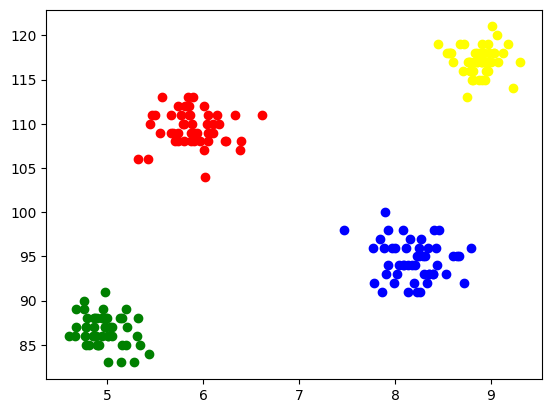

In [31]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# K-Means dalam 3D

In [32]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

# Membuat BLOBS dari data yang ada dengan menggunakan algoritma distribusi Gaussian. 
# Goal : Menghasilkan dataset sampel 2D dengan tiga blob sebagai masalah prediksi klasifikasi multi-class
# X = data sample, y = target
X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [3]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [33]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [34]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

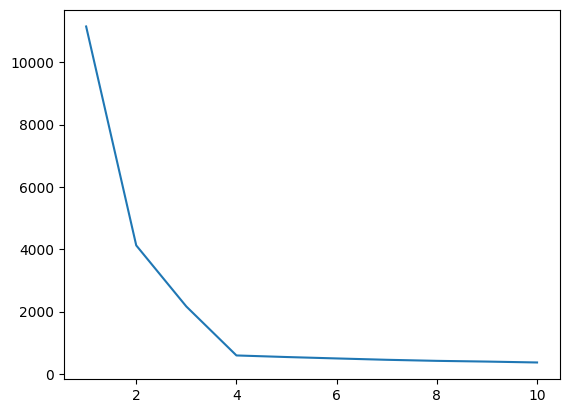

In [35]:
plt.plot(range(1,11),wcss)

In [36]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [37]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [38]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()